## Comparing two 1D discrete distributions. Example

We would like to know which distribution d1 or d2 is closer to distribution u.
The correct answer here should be that distribution d1 is closer to u, because it covers the same area the u covers, whereas d2 only exists in the middle of the u (explanation in very simple English :))


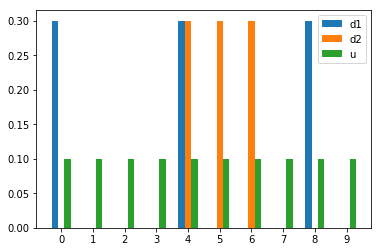

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# small value
sm = 1e-09
d1 = np.repeat(sm, 10)
d1[[0,4,8]]= 0.3
d2 = np.repeat(sm, 10)
d2[[4,5,6]] = 0.3

u = np.repeat(0.1, 10)

## plotting
ind = np.arange(10)
w = 0.2
d1_plot = plt.bar(ind - w, d1, width = w, align='center')
d2_plot = plt.bar(ind, d2, width= w, align='center')
u_plot = plt.bar(ind + w, u, width= w, align='center')
plt.legend( (d1_plot[0], d2_plot[0], u_plot[0]), ('d1', 'd2', 'u') )

objects = list(map(str, range(10)));
plt.xticks(ind, objects);


### Kullback-Leibler divergence

Compares two distribution. Non commutative, thus not a metric.
The smaller the value is the more similar two distribution are.

$$ D_{KL}(p || q) = \sum_{i=0}^N p(x_i) \mathrm{log}\frac{p(x_i)}{q(x_i)} $$

In [31]:
def KLDivergence(p,q):
    logTerm = np.log2(np.divide(p,q))
    d = np.sum(np.multiply(p,logTerm))
    return d

Before the KL divergence could be applied to the discreet distributions, they should be convolved with gaussian kernel. They should be made more smooth.Formally the process is called **Kernel density estimation**. Otherwise in the given example the value of the divergence is the same for <d1,u> and <d2,u>, since they have the same number of bins of the same height. However, since the location of the bins are not the same, the smoothed version will populate the difference nearby bins. I am more than sure that there is a sane mathematical explanation behind this smoothness action, but I don't know it yet :)

### Convolving with gaussian
you need to create a Gaussian that's discretized at the same spatial scale as your curve, then just convolve.
Specifically, say your original curve has N points that are uniformly spaced along the x-axis
Then the point spacing along the x-axis will be (physical range)/(digital range) = (10 -0)/N

**Side note**: Convolving a probability distribution with a normalized kernel leads to a probability distribution. (Simple english) If your value sum up to 1 and convolve them with a kernel (sum of elements of which sum to 1), you will automatically get a probability distribution (all values sum to 1).

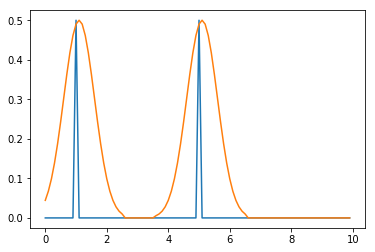

In [32]:
def convolve1D(y, sigma, discr):
    gx = np.arange(-3*sigma, 3*sigma, discr)
    gaussian = np.exp(-(gx/sigma)**2/2)
    z = np.convolve(y, gaussian, mode="same")
    return z

x = np.arange(0,10, 0.1)
y = np.repeat(sm, x.shape[0])
y[[10,50]] = 0.5

z = convolve1D(y, 0.5,0.1)

plt.plot(x,y)
plt.plot(x, z)
plt.show()


In [34]:
sigma = 0.2
d1_blurred = convolve1D(d1, sigma, 1)
d2_blurred = convolve1D(d2, sigma, 1)


#normalize to make it a probability distribution after the convolving
d1_blurred = d1_blurred / np.sum(d1_blurred)
d2_blurred = d2_blurred / np.sum(d2_blurred)

print "Divergence d1 to u", KLDivergence(d1_blurred,u)
print "Divergence d2 to u", KLDivergence(d2_blurred,u)
print "Divergence u to u", KLDivergence(u,u)

Divergence d1 to u 1.3495510787832004
Divergence d2 to u  1.6078272976845267


## Entropy (not properly finished yet)
### Random process perspective
Let's assume there exist a random process (black magic) that produced the distribution we need to work with.
By wikipedia definition, entropy is an average amount of information produced by a random process.
This means that given a distribution, we can compute the entropy as  $$H = -\sum_i^n p(x_i)\mathrm{log(p(x_i))}$$

### Data sending perspective
Let's assume we need to send some information (string/text) though a channel, so that we need to minimize the amount of sent information (bits).
Then we might want to reduce or decrypt the string. And entropy tells us the average amount of bits per letter that are needed to encrypt this string. (Side note: appearently *information theory* will tell how to exactly map those letters to the bits)
If all the symbols occur with the same frequence/probability than there is no better way to reduce the string in less bits than there already are in a string (?) If on the other hand, someone (probably the same black magic from above) tells us the more precise probability of the letters, than we would assign less bits to the letters that occur often and more bits for the rare ones and the average bit information is captured as $$H = -\sum_i^n p(x_i)\mathrm{log_2(p(x_i))}$$

### Other thoughts
The bigger the entropy the more unpredictable the states / variables / values in distribution are?
The biggest entropy is when every state is the same possible, e.g. uniform distribution. Since then every state needs the same amount of bits to be encoded.
The smallest entropy is when the same event occur always/never.

**Intuition behing log**: The more probable the event is, the less information it brings. Since if we observe the same event (variable) all the time, it doesn't tell us about other possible outcomes. Thus, the more rare the event is the more information it brings.
That's why **-log(x)** function is a good choice, since it is monotonically decreasing for increasing values of probability. 
Information should also have other 3 properties discribed on wikipedia under Rationale.

*Question*: if entropy is an average amount of information per state ($x_i$), why can't we just average the -log(x_i) like  $\frac{1}{N}\sum_i^n(-\mathrm{log}p(x_i))$ ?


## visualization of log just to remind how the log looks like :)
prob = np.arange(0.0001, 1.0, 0.01)
f = -np.log2(prob)
plt.subplot(121)
plt.plot(prob, f, 'r-');
plt.xlabel('prob');
plt.ylabel('log');

In [27]:
def computeEntropy(dist):
    ent = 0
    for el in dist:
        ent += -el * np.log2(el)
    return ent


print "Entropy of a distribution", computeEntropy(d1)
le = 0
for el in d1:
    le += -np.log2(el)
print "Average log information ", le/d1.shape[0]
print "Entropy of a uniform distribution", computeEntropy(u)

Entropy of a distribution 1.5632692440310552
Average log information  21.449236676040247
Entropy of a uniform distribution 3.321928094887362


## Connection between KL and Entropy

Based on the wikipedia article (https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) and Kraft-McMillan theorem, we can relate entropy and Kullback-Leibler divergence.
$$ D_{KL}(P|| Q) = -\sum_x{p(x)\mathrm{log}(q_x)} + \sum_x{p(x)\mathrm{log}(p_x)}$$ where the first term is $H(P,Q)$ cross entropy(?) and second term is an entropy $H(P)$